In [1]:
from Functions import load_housing_data, shuffle_and_split, split_data_with_id_hash
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit


In [2]:
housing = load_housing_data()

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


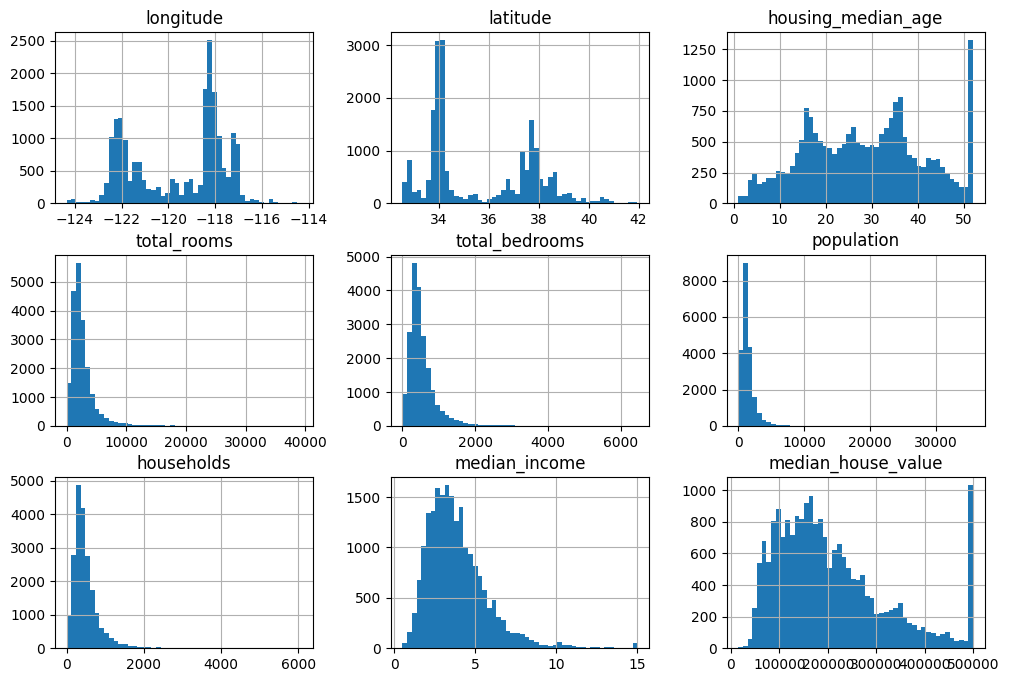

In [7]:
housing.hist(bins = 50, figsize = (12, 8))
plt.show()

In [8]:
train_set, test_set = shuffle_and_split(housing, 0.2)
print(len(train_set), len(test_set))

16512 4128


In [9]:
housing_with_id = housing.reset_index()
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")
###
housing_with_id['id'] = housing_with_id['longitude'] * 1000 + housing_with_id['latitude']
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")


In [10]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

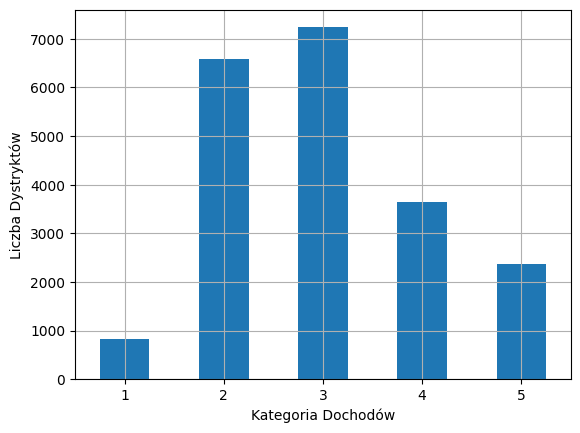

In [11]:
housing['income_cat'] = pd.cut(housing['median_income'], 
                               bins = [0., 1.5, 3.0, 4.5, 6., np.inf ], 
                               labels = [1, 2, 3, 4, 5])
housing['income_cat'].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.xlabel("Kategoria Dochodów")
plt.ylabel("Liczba Dystryktów")
plt.show()

In [12]:
splitter = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)
strat_splis = []
for train_index, test_index in splitter.split(housing, housing['income_cat']):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing_with_id.iloc[test_index]
    strat_splis.append([strat_train_set_n, strat_test_set_n])

strat_train_set, strat_test_set = strat_splis[0]


In [13]:
strat_train_set, strat_test_set = train_test_split(housing, test_size = 0.2, stratify = housing['income_cat'], random_state = 42)

for set_ in (strat_test_set, strat_train_set):
    set_.drop('income_cat', axis = 1, inplace = True)

housing = strat_test_set.copy()

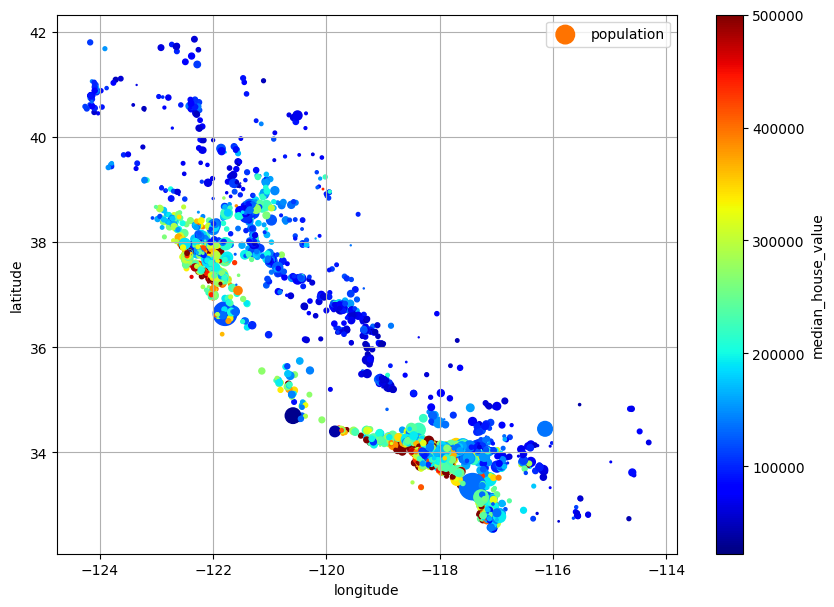

In [14]:
housing.plot(kind = 'scatter', 
             x = 'longitude', 
             y = 'latitude', 
             grid = True, 
             s = housing['population'] / 100, 
             label = 'population',
             c = 'median_house_value', 
             cmap = 'jet',
             colorbar = True,
             legend = True, 
             sharex = False,
             figsize = (10,7))
plt.show()

In [15]:
corr_matrix = housing.corr(numeric_only = True)

In [16]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687091
total_rooms           0.121070
housing_median_age    0.118976
households            0.043549
total_bedrooms        0.029600
longitude            -0.026768
population           -0.040286
latitude             -0.162087
Name: median_house_value, dtype: float64

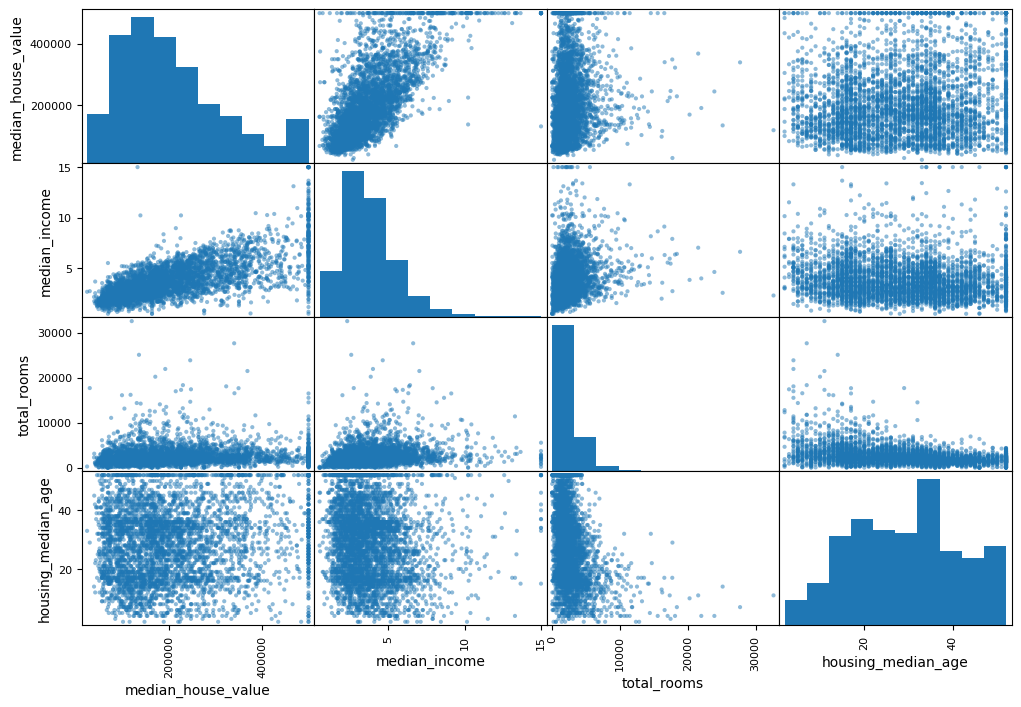

In [17]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize = (12, 8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

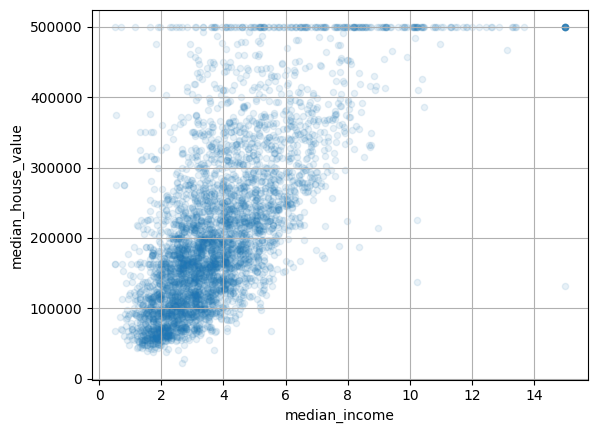

In [18]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1, grid = True)

In [19]:
housing['room_per_family'] = housing['total_bedrooms'] / housing['households']
housing['bedroom_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_house'] = housing['population'] / housing['households']
corr_matrix = housing.corr(numeric_only = True)
corr_matrix['median_house_value'].sort_values(ascending  = False)

median_house_value    1.000000
median_income         0.687091
total_rooms           0.121070
housing_median_age    0.118976
households            0.043549
total_bedrooms        0.029600
people_per_house     -0.025974
longitude            -0.026768
population           -0.040286
room_per_family      -0.054868
latitude             -0.162087
bedroom_ratio        -0.254506
Name: median_house_value, dtype: float64

In [20]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [21]:
housing_num = housing.select_dtypes(include = [np.number])

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [22]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [23]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [24]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

In [25]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(5)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN


In [26]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [27]:
housing_cat_encoded[:5]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.]])

In [28]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [29]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [30]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [31]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [32]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range = (-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [33]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_std_scaler = std_scaler.fit_transform(housing_num)

In [34]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing[['housing_median_age']], [[35]], gamma = 0.1)

In [35]:
from sklearn.linear_model import LinearRegression
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())
model = LinearRegression()
model.fit(housing[['median_income']], scaled_labels)
some_new_data = housing[['median_income']].iloc[:5]
scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [36]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(), transformer = StandardScaler())
model.fit(housing[['median_income']], housing_labels)
predictions = model.predict(some_new_data)

In [37]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func = np.exp)
log_pop = log_transformer.transform(housing[['population']])

In [38]:
rbf_transfomer = FunctionTransformer(rbf_kernel, kw_args=dict(Y = [[35]], gamma = 0.2), )
age_simil_35 = rbf_transfomer.transform(housing[['housing_median_age']])

In [39]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel, kw_args= dict(Y = [sf_coords], gamma = 0.1))
sf_simil = sf_transformer.transform(housing[['latitude', 'longitude']])


In [40]:
from Classes import StandardScalerClone, ClusterSimilarity


In [41]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma = 1, random_state = 42)
similarities = cluster_simil.fit_transform(housing[['latitude', 'longitude']], sample_weight = housing_labels)
similarities[:3].round(3)

array([[0.   , 0.98 , 0.   , 0.   , 0.001, 0.   , 0.127, 0.555, 0.   ,
        0.56 ],
       [0.644, 0.   , 0.111, 0.039, 0.   , 0.   , 0.   , 0.   , 0.991,
        0.   ],
       [0.   , 0.655, 0.   , 0.   , 0.01 , 0.   , 0.489, 0.586, 0.   ,
        0.277]])

In [42]:
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
    ('impute' , SimpleImputer(strategy = 'median')),
    ('standarize', StandardScaler())
])

In [43]:
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standarize', StandardScaler())])

In [44]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [45]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns=num_pipeline.get_feature_names_out(), index = housing_num.index)

In [46]:
df_housing_num_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396


In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
num_attribs = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
cat_attribs = ['ocean_proximity']
cat_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'),
                             OneHotEncoder(handle_unknown = 'ignore'))
preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)])

In [48]:
preprocessing.fit_transform(housing)

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]], shape=(16512, 13))

In [49]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include = np.number)), 
    (cat_pipeline, make_column_selector(dtype_include = object))
)
housing_prepared = preprocessing.fit_transform(housing)


In [50]:
def column_ratio(X):
    return X[ :, [0]] / X[ :, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ['ratio']

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy = 'median'),
        FunctionTransformer(column_ratio, feature_names_out = ratio_name),
        StandardScaler()
    )

log_pipeline = make_pipeline(
    SimpleImputer(strategy = 'median'),
    FunctionTransformer(np.log, feature_names_out = 'one-to-one'),
    StandardScaler()
)

cluster_simil = ClusterSimilarity(n_clusters = 10, gamma = 1, random_state = 42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy = 'median'))
preprocessing = ColumnTransformer([
    ('bedroom_ratio', ratio_pipeline(), ['total_bedrooms', 'total_rooms']), 
    ('rooms_per_family', ratio_pipeline(), ['total_rooms', 'households']), 
    ('people_per_house', ratio_pipeline(), ['population', 'households']),
    ('log', log_pipeline, ['total_bedrooms', 'total_rooms', 'population', 'households', 'median_income']), 
    ('geo', cluster_simil, ['latitude', 'longitude']), 
    ('cat', cat_pipeline, make_column_selector(dtype_include=object))
],
remainder=default_num_pipeline)


housing_prepared = preprocessing.fit_transform(housing)
print(housing_prepared.shape)
print(preprocessing.get_feature_names_out())



(16512, 24)
['bedroom_ratio__ratio' 'rooms_per_family__ratio'
 'people_per_house__ratio' 'log__total_bedrooms' 'log__total_rooms'
 'log__population' 'log__households' 'log__median_income'
 'geo__Similarity 0 cluster' 'geo__Similarity 1 cluster'
 'geo__Similarity 2 cluster' 'geo__Similarity 3 cluster'
 'geo__Similarity 4 cluster' 'geo__Similarity 5 cluster'
 'geo__Similarity 6 cluster' 'geo__Similarity 7 cluster'
 'geo__Similarity 8 cluster' 'geo__Similarity 9 cluster'
 'cat__ocean_proximity_<1H OCEAN' 'cat__ocean_proximity_INLAND'
 'cat__ocean_proximity_ISLAND' 'cat__ocean_proximity_NEAR BAY'
 'cat__ocean_proximity_NEAR OCEAN' 'remainder__housing_median_age']


In [52]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001DBAD90C180>)])),
                ('linearregression', LinearRegression())])

In [53]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[ : 5].round(-2)

array([246000., 372700., 135700.,  91400., 330900.])

In [54]:
housing_labels[ : 5].round(-2)

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
Name: median_house_value, dtype: float64

In [55]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions)
print(lin_rmse)

4757259431.847188


In [56]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state = 42))
tree_reg.fit(housing, housing_labels)
housing_predictions = tree_reg.predict(housing)

tree_rmse = mean_squared_error(housing_labels, housing_predictions)
print(tree_rmse)

0.0


In [57]:
from sklearn.model_selection import cross_val_score

tree_rmse = - cross_val_score(tree_reg, housing, housing_labels, scoring = 'neg_root_mean_squared_error', cv = 10)
print(pd.Series(tree_rmse).describe())

count       10.000000
mean     66573.734600
std       1103.402323
min      64607.896046
25%      66204.731788
50%      66388.272499
75%      66826.257468
max      68532.210664
dtype: float64


In [58]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state = 42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels, scoring = 'neg_root_mean_squared_error', cv = 10)
print(pd.Series(forest_rmses).describe())

count       10.000000
mean     47038.092799
std       1021.491757
min      45495.976649
25%      46510.418013
50%      47118.719249
75%      47480.519175
max      49140.832210
dtype: float64


In [59]:
print(pd.Series(forest_rmses).describe())

count       10.000000
mean     47038.092799
std       1021.491757
min      45495.976649
25%      46510.418013
50%      47118.719249
75%      47480.519175
max      49140.832210
dtype: float64


In [60]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('random_forest', RandomForestRegressor(random_state = 42))
])

param_grid = [{'preprocessing__geo__n_clusters' : [5, 8, 10],
              'random_forest__max_features' : [4, 6, 8]},
              {'preprocessing__geo__n_clusters' : [10, 15], 
               'random_forest__max_features' : [6, 8, 10]}]

grid_search = GridSearchCV(full_pipeline, param_grid, cv = 3, scoring = 'neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001DBAD90C180>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [61]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [62]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by = 'mean_test_score', ascending = False, inplace = True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,4.911354,0.109323,0.103669,0.000644,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-42725.423800,-43708.197434,-44334.935606,-43589.518946,662.417543,1
13,6.242936,0.027210,0.108188,0.006188,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-43486.175916,-43819.842374,-44899.968680,-44068.662323,603.399271,2
6,3.275983,0.029607,0.109101,0.007797,10,4,"{'preprocessing__geo__n_clusters': 10, 'random...",-43797.854175,-44036.240246,-44960.694004,-44264.929475,501.513170,3
9,4.797238,0.044175,0.106058,0.001071,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-43709.661050,-44163.463178,-44966.539107,-44279.887778,519.680433,4
7,4.799541,0.014372,0.106652,0.002050,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-43709.661050,-44163.463178,-44966.539107,-44279.887778,519.680433,4


In [63]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_distribs = {'preprocessing__geo__n_clusters' : randint(low = 3, high = 50), 
                   'random_forest__max_features' : randint(low = 2, high = 20)}

rnd_search = RandomizedSearchCV(full_pipeline, param_distributions=params_distribs, n_iter = 10, cv = 3, scoring = 'neg_root_mean_squared_error', random_state = 42)
rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DBB59E9A90>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DBAD94B890>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [68]:
final_model = rnd_search.best_estimator_
feature_importances = final_model['random_forest'].feature_importances_
print(feature_importances.round(2))

[0.07 0.05 0.05 0.01 0.01 0.01 0.01 0.19 0.01 0.02 0.01 0.01 0.01 0.
 0.01 0.02 0.01 0.02 0.01 0.   0.01 0.02 0.01 0.01 0.01 0.   0.02 0.01
 0.01 0.   0.01 0.01 0.01 0.03 0.01 0.01 0.01 0.01 0.04 0.01 0.02 0.01
 0.02 0.01 0.02 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.   0.07 0.
 0.   0.   0.01]


In [71]:
sorted(zip(feature_importances, final_model['preprocessing'].get_feature_names_out()), reverse = True)

[(np.float64(0.18599734460509473), 'log__median_income'),
 (np.float64(0.07338850855844488), 'cat__ocean_proximity_INLAND'),
 (np.float64(0.06556941990883974), 'bedrooms__ratio'),
 (np.float64(0.05364871007672531), 'rooms_per_house__ratio'),
 (np.float64(0.04598870861894748), 'people_per_house__ratio'),
 (np.float64(0.04175269214442519), 'geo__Similarity 30 cluster'),
 (np.float64(0.025976797232869674), 'geo__Similarity 25 cluster'),
 (np.float64(0.023595895886342252), 'geo__Similarity 36 cluster'),
 (np.float64(0.02021056221732893), 'geo__Similarity 9 cluster'),
 (np.float64(0.018606917076661445), 'geo__Similarity 34 cluster'),
 (np.float64(0.01813798837462886), 'geo__Similarity 37 cluster'),
 (np.float64(0.01740435316632674), 'geo__Similarity 18 cluster'),
 (np.float64(0.01677838614384489), 'geo__Similarity 1 cluster'),
 (np.float64(0.015459009666188978), 'geo__Similarity 7 cluster'),
 (np.float64(0.015325731028175922), 'geo__Similarity 32 cluster'),
 (np.float64(0.015073772015038346

In [72]:
X_test = strat_test_set.drop('median_house_value', axis = 1)
y_test = strat_test_set['median_house_value']
final_predictions = final_model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_predictions)
print(final_rmse)


1717732227.9191785


In [ ]:
import joblib 
joblip.dump(final_model, 'my_california_housing_model.pkl')


In [65]:
2333333333333333333e3w========

SyntaxError: invalid decimal literal (3612656583.py, line 1)